### Nạp các gói thư viện cần thiết 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Chuẩn bị dữ liệu

In [2]:

# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Lấy dữ liệu thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values
#print(X)

### 2. Tiến hành gom nhóm
Khi tiến hành các giải thuật để gom nhóm,

câu hỏi đặt ra là với dataset đã có,

chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?

Trong ví dụ này chúng ta sẽ sử dụng Dendrogram để xác định số cụm.

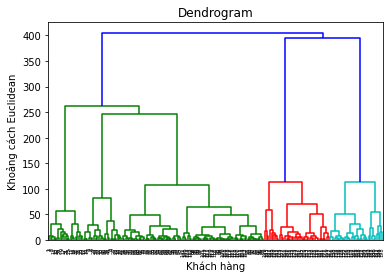

In [3]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách Euclidean')
plt.show()

In [4]:
# Qua đồ thị Dendrogram, chúng ta thấy số cụm tối ưu có khả năng là 5 cụm
# Chúng ta tiến hành gom cụm với số cụm là 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

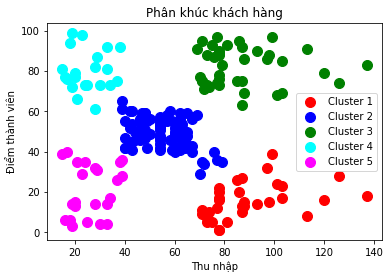

In [5]:
# Hiển thị các cụm dữ liệu
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Phân khúc khách hàng')
plt.xlabel('Thu nhập')
plt.ylabel('Điểm thành viên')
plt.legend()
plt.show()